<a href="https://colab.research.google.com/github/NMNayan57/2D-house/blob/main/Parkinson(Final_work).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [829]:
#Relevant Libraries Import 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os

#import shap
#%matplotlib inline
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


In [830]:
#Dataset Import
df = pd.read_csv("/content/parkinsons.csv") 

In [831]:
#data preprocessing Start

df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [832]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [833]:
df['status'].value_counts()


1    147
0     48
Name: status, dtype: int64

Replace Simillar Values to Unique Values 

information about dataset

In [834]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Here we find class and Gender has object value so we need to convert them into Encoded label through label encoder

Heat map

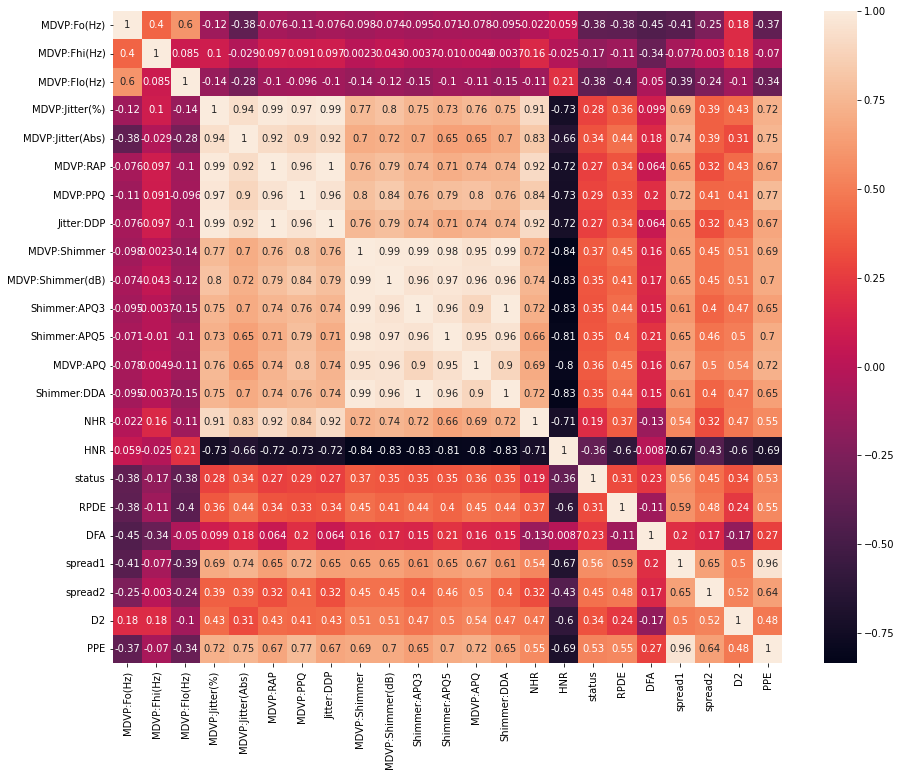

In [835]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [836]:
correlation_matrix = df.corr(method='pearson')

correlation_matrix 

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


# **Label Encoder**

In [837]:
df.name= le.fit_transform(df.name.values)


In [838]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    int64  
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [839]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Removing duplicated data points
 if find any



In [840]:
print(f"There are {df.duplicated().sum()} duplicates data")


There are 0 duplicates data


finding is null value avilable 

In [841]:
df.isnull().sum()


name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

**Creating a test set**

In [842]:
original_train_df, test_df = train_test_split(df, test_size=0.2)

# To be sure we will create a copy for further processing
train_df = original_train_df.copy() 

Gaining further insight
**bold text**

In [843]:
df1=df

In [844]:
df1.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [845]:
#from sklearn.preprocessing import StandardScaler

#stan_scaler = StandardScaler()

#temp2_df = df1
#df_scaledstd = pd.DataFrame(stan_scaler.fit_transform(temp2_df),columns = df.columns)
# transform all attributes
#temp2_df[column_names] = stan_scaler.fit_transform(temp2_df[column_names])
#temp2_df.sort_index(inplace=True)
#temp2_df.head()


In [846]:
df_scaledstd=df1
df_scaledstd

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


**Rescaling or standardizing attributes**

In [847]:
pip install featurewiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [848]:
from featurewiz import featurewiz


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (195, 24)
    Some column names had special characters which were removed...
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S 

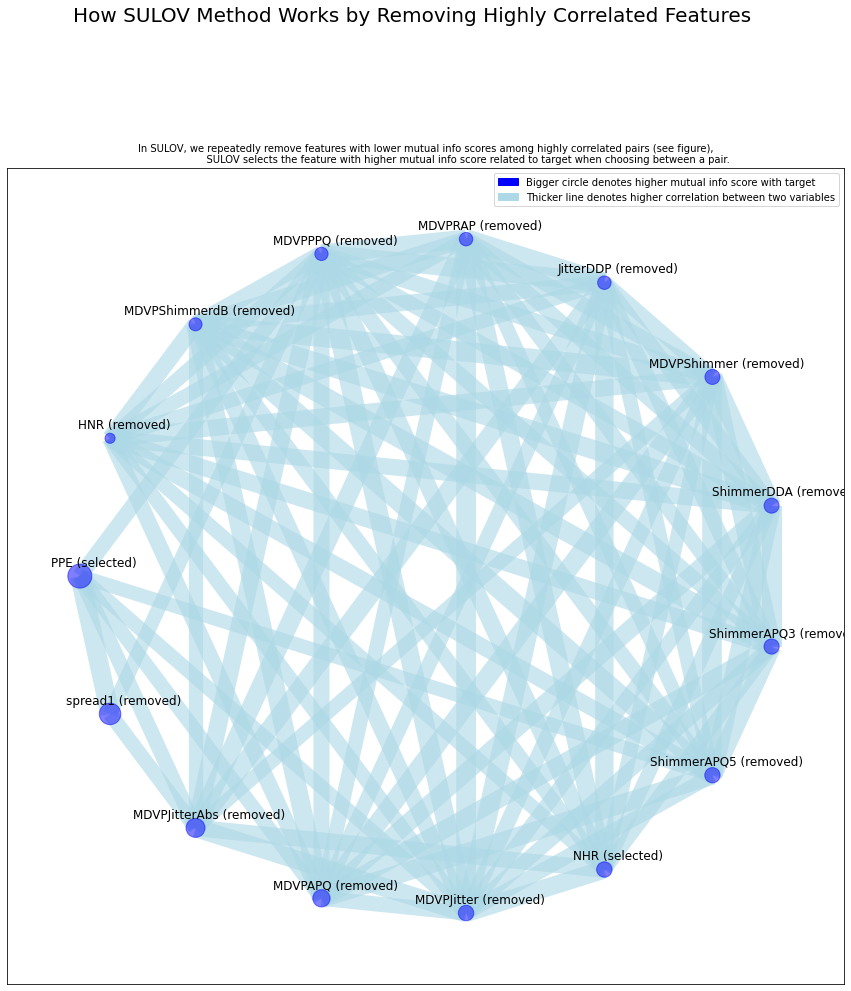

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 9
Final list of selected 9 vars after SULOV = ['D2', 'DFA', 'MDVPFhiHz', 'MDVPFloHz', 'MDVPFoHz', 'RPDE', 'spread2', 'PPE', 'NHR']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 9 
    Taking top 5 features per iteration...
    XGBoost version using 1.7.4 as tree method: gpu_hist
Number of booster rounds = 100
        using 9 variables...
Regular XGBoost is crashing due to: [18:05:40] ../src/gbm/gbtree.cc:625: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.
Stack trace:
  [bt] (0

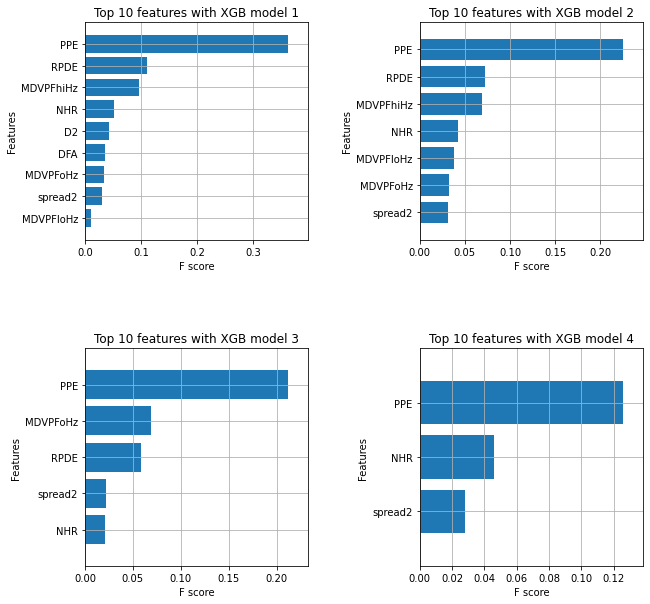

    Completed XGBoost feature selection in 1 seconds
    Alert: No ID variables ['name'] are included in selected features
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 0 important features:
[]
Total Time taken for featurewiz selection = 2 seconds
Output contains a list of 0 important features and a train dataframe


In [849]:





target = 'status'
 
features, train = featurewiz(df_scaledstd, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [850]:
print(features)


[]


In [851]:
featuresinit=['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', ' Shimmer:APQ5','MDVP:APQ ',
              'Shimmer:DDA',' NHR','HNR',' status','RPDE','DFA','spread1','spread2','D2','PPE']

In [852]:
featuresnewfromfeaturewiz=['D2', 'DFA', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Fo(Hz)', 'RPDE', 'spread2','PPE','NHR','name']


In [853]:
#After Domain Expert Opinion, FeatureWIZ, FilterBased (Chi-Squared) and WrapperBased  Method = Selected Features. 
featuresfinal=['D2', 'DFA', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Fo(Hz)', 'RPDE', 'spread2','PPE','NHR','name']

In [854]:
features_for_lime=featuresfinal

In [855]:
#df.head(5)
df_scaledstd.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [856]:
df_scaledstd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    int64  
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [857]:
#df_new=df_scaledstd.drop('ID', axis=1)
df_new=df_scaledstd.drop(columns=['HNR', 'Jitter:DDP', 'MDVP:APQ','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:PPQ','MDVP:RAP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','Shimmer:DDA','spread1',])


In [858]:
df_new.head(5)



,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),NHR,status,RPDE,DFA,spread2,D2,PPE
0,0,119.992,157.302,74.997,0.02211,1,0.414783,0.815285,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.01929,1,0.458359,0.819521,0.335590,2.486855,0.368674
2,2,116.682,131.111,111.555,0.01309,1,0.429895,0.825288,0.311173,2.342259,0.332634
3,3,116.676,137.871,111.366,0.01353,1,0.434969,0.819235,0.334147,2.405554,0.368975
4,4,116.014,141.781,110.655,0.01767,1,0.417356,0.823484,0.234513,2.332180,0.410335


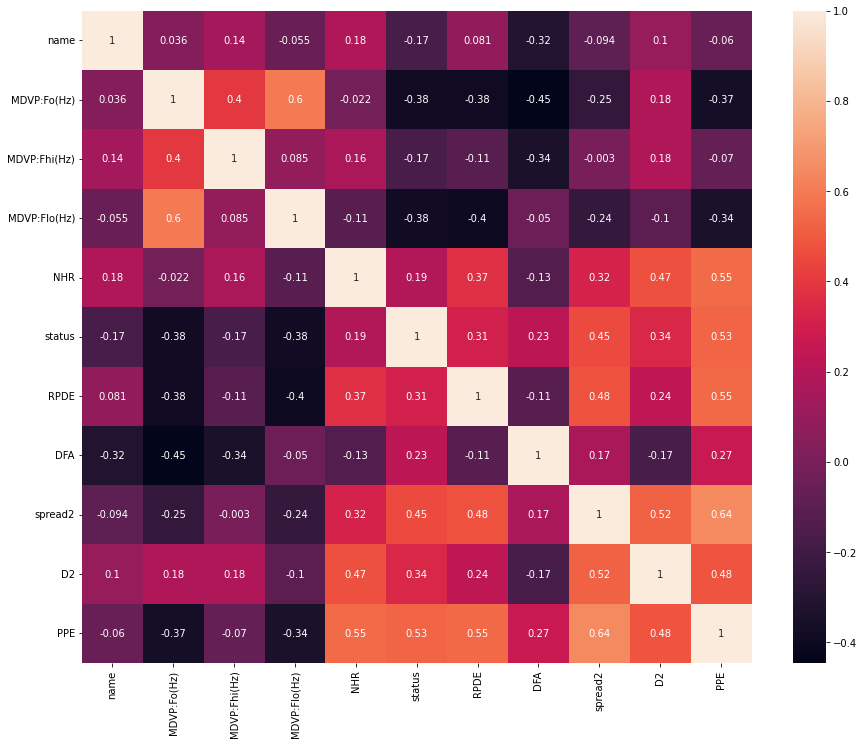

In [859]:
plt.figure(figsize=(15,12))
sns.heatmap(df_new.corr(), annot=True)
plt.show()

In [860]:
correlation_matrix = df_new.corr(method='pearson')

correlation_matrix 

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),NHR,status,RPDE,DFA,spread2,D2,PPE
name,1.000000,0.035996,0.138838,-0.054709,0.177582,-0.167497,0.081444,-0.315645,-0.093673,0.101137,-0.060412
MDVP:Fo(Hz),0.035996,1.000000,0.400985,0.596546,-0.021981,-0.383535,-0.383894,-0.446013,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.138838,0.400985,1.000000,0.084951,0.163766,-0.166136,-0.112404,-0.343097,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),-0.054709,0.596546,0.084951,1.000000,-0.108670,-0.380200,-0.400143,-0.050406,-0.243829,-0.100629,-0.340071
NHR,0.177582,-0.021981,0.163766,-0.108670,1.000000,0.189429,0.370890,-0.131882,0.318099,0.470949,0.552591
status,-0.167497,-0.383535,-0.166136,-0.380200,0.189429,1.000000,0.308567,0.231739,0.454842,0.340232,0.531039
RPDE,0.081444,-0.383894,-0.112404,-0.400143,0.370890,0.308567,1.000000,-0.110950,0.479905,0.236931,0.545886
DFA,-0.315645,-0.446013,-0.343097,-0.050406,-0.131882,0.231739,-0.110950,1.000000,0.166548,-0.165381,0.270445
spread2,-0.093673,-0.249450,-0.002954,-0.243829,0.318099,0.454842,0.479905,0.166548,1.000000,0.523532,0.644711
D2,0.101137,0.177980,0.176323,-0.100629,0.470949,0.340232,0.236931,-0.165381,0.523532,1.000000,0.480585


In [861]:
dfnew=df_new
#dfnew.info()
dfnew['status'].unique()

array([1, 0])

In [862]:
X = dfnew.drop( 'status', axis=1)
y = dfnew['status']


In [863]:
X.shape



(195, 10)

In [864]:
y.shape

(195,)

In [888]:

#Splitting the dataset into the Training set and Test set
#X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.30, random_state =60, stratify = y)
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.25, random_state =87, stratify = y)

In [890]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import classification_report
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (146, 10)
Number transactions y_train dataset:  (146,)
Number transactions X_test dataset:  (49, 10)
Number transactions y_test dataset:  (49,)


In [891]:

# logistic regression object
lr = LogisticRegression()
  
# train the model on train set
lr.fit(X_train, y_train.ravel())
  
predictions = lr.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.33      0.47        12
           1       0.82      0.97      0.89        37

    accuracy                           0.82        49
   macro avg       0.81      0.65      0.68        49
weighted avg       0.81      0.82      0.79        49



In [892]:
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

mse= 0.1836734693877551
msle= 0.08824647194415944
mae= 0.1836734693877551
rmse= 0.4285714285714286


In [893]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train.ravel())
predictions = DT.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.97      0.99        37

    accuracy                           0.98        49
   macro avg       0.96      0.99      0.97        49
weighted avg       0.98      0.98      0.98        49

mse= 0.02040816326530612
msle= 0.00980516354935105
mae= 0.02040816326530612
rmse= 0.14285714285714285


In [894]:
# support vector machine object
svm = SVC(kernel='linear')
  
# train the model on train set
svm.fit(X_train, y_train.ravel())
  
predictions = svm.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.80      0.33      0.47        12
           1       0.82      0.97      0.89        37

    accuracy                           0.82        49
   macro avg       0.81      0.65      0.68        49
weighted avg       0.81      0.82      0.79        49

mse= 0.1836734693877551
msle= 0.08824647194415944
mae= 0.1836734693877551
rmse= 0.4285714285714286


In [895]:
# support vector machine object rbf
svm = SVC(kernel='rbf')
  
# train the model on train set
svm.fit(X_train, y_train.ravel())
  
predictions = svm.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40        12
           1       0.80      1.00      0.89        37

    accuracy                           0.82        49
   macro avg       0.90      0.62      0.65        49
weighted avg       0.85      0.82      0.77        49

mse= 0.1836734693877551
msle= 0.08824647194415944
mae= 0.1836734693877551
rmse= 0.4285714285714286


In [896]:
# KNN classifier machine object
KNN =  KNeighborsClassifier()
  
# train the model on train set
KNN.fit(X_train, y_train.ravel())
  
predictions = KNN.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.92      0.97      0.95        37

    accuracy                           0.92        49
   macro avg       0.91      0.86      0.88        49
weighted avg       0.92      0.92      0.92        49

mse= 0.08163265306122448
msle= 0.0392206541974042
mae= 0.08163265306122448
rmse= 0.2857142857142857


In [897]:
# GNB classifier machine object
GNB =  GaussianNB()
  
# train the model on train set
GNB.fit(X_train, y_train.ravel())
  
predictions = GNB.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.86      0.84      0.85        37

    accuracy                           0.78        49
   macro avg       0.70      0.71      0.70        49
weighted avg       0.78      0.78      0.78        49

mse= 0.22448979591836735
msle= 0.10785679904286154
mae= 0.22448979591836735
rmse= 0.47380354147934284


In [898]:




# XGB classifier machine object
XGB = XGBClassifier()
  
# train the model on train set
XGB.fit(X_train, y_train.ravel())
  
predictions = XGB.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.97      0.99        37

    accuracy                           0.98        49
   macro avg       0.96      0.99      0.97        49
weighted avg       0.98      0.98      0.98        49

mse= 0.02040816326530612
msle= 0.00980516354935105
mae= 0.02040816326530612
rmse= 0.14285714285714285


In [899]:
# MLP classifier machine object
MLP = MLPClassifier(random_state=1, max_iter=300)
# train the model on train set
MLP.fit(X_train, y_train.ravel())
  
predictions = MLP.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.87      0.92      0.89        37

    accuracy                           0.84        49
   macro avg       0.79      0.75      0.77        49
weighted avg       0.83      0.84      0.83        49

mse= 0.16326530612244897
msle= 0.0784413083948084
mae= 0.16326530612244897
rmse= 0.40406101782088427


In [900]:
# adaboost classifier machine object
adaboost =AdaBoostClassifier(random_state=96)
# train the model on train set
adaboost.fit(X_train, y_train.ravel())
  
predictions = adaboost.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.97      1.00      0.99        37

    accuracy                           0.98        49
   macro avg       0.99      0.96      0.97        49
weighted avg       0.98      0.98      0.98        49

mse= 0.02040816326530612
msle= 0.00980516354935105
mae= 0.02040816326530612
rmse= 0.14285714285714285


In [901]:
# random Forest classifier machine object
RF =RandomForestClassifier(max_depth=2, random_state=0)
# train the model on train set
RF.fit(X_train, y_train.ravel())
  
predictions = RF.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.84      1.00      0.91        37

    accuracy                           0.86        49
   macro avg       0.92      0.71      0.75        49
weighted avg       0.88      0.86      0.83        49

mse= 0.14285714285714285
msle= 0.06863614484545734
mae= 0.14285714285714285
rmse= 0.3779644730092272


In [902]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('Before OverSampling, the shape of train_X: {}'.format(X.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y.shape))





Before OverSampling, counts of label '1': 110
Before OverSampling, counts of label '0': 36 

Before OverSampling, the shape of train_X: (195, 10)
Before OverSampling, the shape of train_y: (195,) 



In [903]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [904]:
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm_over = SMOTE(random_state = 2)

X_train_res, y_train_res = sm_over.fit_resample(X_train, y_train.ravel())

In [905]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (220, 10)
After OverSampling, the shape of train_y: (220,) 

After OverSampling, counts of label '1': 110
After OverSampling, counts of label '0': 110


In [906]:

lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71        12
           1       0.94      0.84      0.89        37

    accuracy                           0.84        49
   macro avg       0.78      0.84      0.80        49
weighted avg       0.86      0.84      0.84        49

mse= 0.16326530612244897
msle= 0.0784413083948084
mae= 0.16326530612244897
rmse= 0.40406101782088427


In [907]:
#decision tree after 
DT1 = DecisionTreeClassifier()
DT1.fit(X_train_res, y_train_res.ravel())
predictions = DT1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.97      0.92      0.94        37

    accuracy                           0.92        49
   macro avg       0.88      0.92      0.90        49
weighted avg       0.93      0.92      0.92        49

mse= 0.08163265306122448
msle= 0.0392206541974042
mae= 0.08163265306122448
rmse= 0.2857142857142857


In [908]:
# support vector machine object
svm1 = SVC(kernel='linear')
  
# train the model on train set
svm1.fit(X_train_res, y_train_res.ravel())
  
predictions = svm1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.91      0.84      0.87        37

    accuracy                           0.82        49
   macro avg       0.76      0.79      0.77        49
weighted avg       0.84      0.82      0.82        49

mse= 0.1836734693877551
msle= 0.08824647194415944
mae= 0.1836734693877551
rmse= 0.4285714285714286


In [909]:
# support vector machine object
svm2 = SVC(kernel='rbf')
  
# train the model on train set
svm2.fit(X_train_res, y_train_res.ravel())
  
predictions = svm1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.91      0.84      0.87        37

    accuracy                           0.82        49
   macro avg       0.76      0.79      0.77        49
weighted avg       0.84      0.82      0.82        49

mse= 0.1836734693877551
msle= 0.08824647194415944
mae= 0.1836734693877551
rmse= 0.4285714285714286


In [910]:
# KNN classifier machine object
KNN1 =  KNeighborsClassifier()
  
# train the model on train set
KNN1.fit(X_train_res, y_train_res.ravel())
  
predictions = KNN1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.95      0.97        37

    accuracy                           0.96        49
   macro avg       0.93      0.97      0.95        49
weighted avg       0.97      0.96      0.96        49

mse= 0.04081632653061224
msle= 0.0196103270987021
mae= 0.04081632653061224
rmse= 0.20203050891044214


In [911]:
# GNB classifier machine object
GNB1 =  GaussianNB()
  
# train the model on train set
GNB1.fit(X_train_res, y_train_res.ravel())
  
predictions = GNB1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57        12
           1       0.88      0.78      0.83        37

    accuracy                           0.76        49
   macro avg       0.69      0.73      0.70        49
weighted avg       0.79      0.76      0.77        49

mse= 0.24489795918367346
msle= 0.11766196259221258
mae= 0.24489795918367346
rmse= 0.4948716593053935


In [912]:
# XGB classifier machine object
XGB1 =XGBClassifier()
XGB1.fit(X_train_res, y_train_res.ravel())
predictions = XGB1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        37

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49

mse= 0.0
msle= 0.0
mae= 0.0
rmse= 0.0


In [913]:
# MLP classifier machine object
MLP1 = MLPClassifier(random_state=1, max_iter=300)
# train the model on train set
MLP1.fit(X_train_res, y_train_res.ravel())
  
predictions = MLP1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.88      0.95      0.91        37

    accuracy                           0.86        49
   macro avg       0.83      0.76      0.79        49
weighted avg       0.85      0.86      0.85        49

mse= 0.14285714285714285
msle= 0.06863614484545734
mae= 0.14285714285714285
rmse= 0.3779644730092272


In [914]:
# adaboost classifier machine object
adaboost1 =AdaBoostClassifier(random_state=96)
# train the model on train set
adaboost1.fit(X_train_res, y_train_res.ravel())
  
predictions = adaboost1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.97      0.95      0.96        37

    accuracy                           0.94        49
   macro avg       0.91      0.93      0.92        49
weighted avg       0.94      0.94      0.94        49

mse= 0.061224489795918366
msle= 0.029415490648053145
mae= 0.061224489795918366
rmse= 0.24743582965269675


In [915]:
# random Forest classifier machine object
RF1 =RandomForestClassifier(max_depth=2, random_state=0)
# train the model on train set
RF1.fit(X_train_res, y_train_res.ravel())
  
predictions = RF1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.97      0.84      0.90        37

    accuracy                           0.86        49
   macro avg       0.81      0.88      0.83        49
weighted avg       0.89      0.86      0.86        49

mse= 0.14285714285714285
msle= 0.06863614484545734
mae= 0.14285714285714285
rmse= 0.3779644730092272


In [916]:
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())

In [917]:
#NEAR MISS RESULT 
print('After UnderSampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_miss.shape))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

After UnderSampling, the shape of train_X: (72, 10)
After UnderSampling, the shape of train_y: (72,) 

After UnderSampling, counts of label '1': 36
After UnderSampling, counts of label '0': 36


In [918]:

lr1 = LogisticRegression()
lr1.fit(X_train_miss, y_train_miss.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.59      0.83      0.69        12
           1       0.94      0.81      0.87        37

    accuracy                           0.82        49
   macro avg       0.76      0.82      0.78        49
weighted avg       0.85      0.82      0.83        49

mse= 0.1836734693877551
msle= 0.08824647194415944
mae= 0.1836734693877551
rmse= 0.4285714285714286


In [919]:
#decision tree after 
DT1 = DecisionTreeClassifier()
DT1.fit(X_train_miss, y_train_miss.ravel())
predictions = DT1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.95      0.97        37

    accuracy                           0.96        49
   macro avg       0.93      0.97      0.95        49
weighted avg       0.97      0.96      0.96        49

mse= 0.04081632653061224
msle= 0.0196103270987021
mae= 0.04081632653061224
rmse= 0.20203050891044214


In [920]:
# support vector machine object
svm1 = SVC(kernel='linear')
  
# train the model on train set
svm1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = svm1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71        12
           1       0.94      0.84      0.89        37

    accuracy                           0.84        49
   macro avg       0.78      0.84      0.80        49
weighted avg       0.86      0.84      0.84        49

mse= 0.16326530612244897
msle= 0.0784413083948084
mae= 0.16326530612244897
rmse= 0.40406101782088427


In [921]:
# support vector machine object
svm1 = SVC(kernel='rbf')
  
# train the model on train set
svm1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = svm1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.43      0.50      0.46        12
           1       0.83      0.78      0.81        37

    accuracy                           0.71        49
   macro avg       0.63      0.64      0.63        49
weighted avg       0.73      0.71      0.72        49

mse= 0.2857142857142857
msle= 0.13727228969091468
mae= 0.2857142857142857
rmse= 0.5345224838248488


In [922]:
# KNN classifier machine object
KNN1 =  KNeighborsClassifier()
  
# train the model on train set
KNN1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = KNN1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71        12
           1       0.94      0.84      0.89        37

    accuracy                           0.84        49
   macro avg       0.78      0.84      0.80        49
weighted avg       0.86      0.84      0.84        49

mse= 0.16326530612244897
msle= 0.07844130839480838
mae= 0.16326530612244897
rmse= 0.40406101782088427


In [923]:
# GNB classifier machine object
GNB1 =  GaussianNB()
  
# train the model on train set
GNB1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = GNB1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.41      0.58      0.48        12
           1       0.84      0.73      0.78        37

    accuracy                           0.69        49
   macro avg       0.63      0.66      0.63        49
weighted avg       0.74      0.69      0.71        49

mse= 0.30612244897959184
msle= 0.14707745324026572
mae= 0.30612244897959184
rmse= 0.5532833351724882


In [924]:
# XGB classifier machine object
XGB1 =XGBClassifier()
XGB1.fit(X_train_miss, y_train_miss.ravel())
predictions = XGB1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       1.00      0.86      0.93        37

    accuracy                           0.90        49
   macro avg       0.85      0.93      0.88        49
weighted avg       0.93      0.90      0.90        49

mse= 0.10204081632653061
msle= 0.04902581774675524
mae= 0.10204081632653061
rmse= 0.31943828249996997


In [925]:
# MLP classifier machine object
MLP1 = MLPClassifier(random_state=1, max_iter=300)
# train the model on train set
MLP1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = MLP1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.56      0.75      0.64        12
           1       0.91      0.81      0.86        37

    accuracy                           0.80        49
   macro avg       0.74      0.78      0.75        49
weighted avg       0.82      0.80      0.80        49

mse= 0.20408163265306123
msle= 0.09805163549351048
mae= 0.20408163265306123
rmse= 0.45175395145262565


In [926]:
# adaboost classifier machine object
adaboost1 =AdaBoostClassifier(random_state=96)
# train the model on train set
adaboost1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = adaboost1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.92      0.96        37

    accuracy                           0.94        49
   macro avg       0.90      0.96      0.92        49
weighted avg       0.95      0.94      0.94        49

mse= 0.061224489795918366
msle= 0.029415490648053145
mae= 0.061224489795918366
rmse= 0.24743582965269675


In [927]:
# random Forest classifier machine object
RF1 =RandomForestClassifier(max_depth=2, random_state=0)
# train the model on train set
RF1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = RF1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.97      0.84      0.90        37

    accuracy                           0.86        49
   macro avg       0.81      0.88      0.83        49
weighted avg       0.89      0.86      0.86        49

mse= 0.14285714285714285
msle= 0.06863614484545734
mae= 0.14285714285714285
rmse= 0.3779644730092272


In [928]:
print(features_for_lime)


['D2', 'DFA', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Fo(Hz)', 'RPDE', 'spread2', 'PPE', 'NHR', 'name']


In [929]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [930]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=features_for_lime,
    class_names=['0', '1'],
    mode='classification'
)

In [931]:
exp = explainer.explain_instance(
    data_row=X_test[1], 
    predict_fn=XGB1.predict_proba
)

exp.show_in_notebook(show_table=True)

In [932]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [933]:
import shap


In [934]:
explainer = shap.TreeExplainer(DT)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value



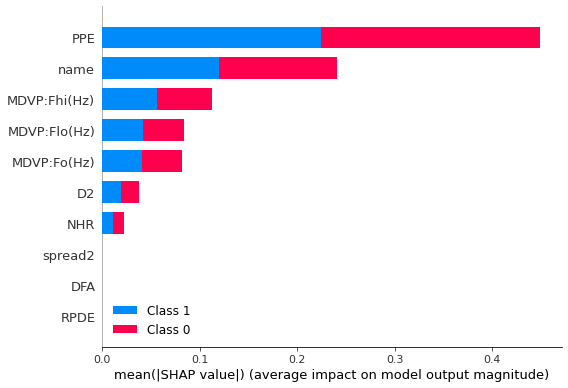

In [935]:
# Generate summary dot plot
shap.summary_plot(shap_values, X,title="SHAP summary plot") 

In [936]:
pip install explainerdashboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [937]:
import explainerdashboard as expdb
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from explainerdashboard import InlineExplainer
from explainerdashboard.custom import (ImportancesComposite,
                                       IndividualPredictionsComposite,
                                       WhatIfComposite,
                                       ShapDependenceComposite,
                                       ShapInteractionsComposite,
                                       DecisionTreesComposite)

In [938]:
X_train = pd.DataFrame(X_train, columns = X.columns)

X_test = pd.DataFrame(X_test, columns=X.columns)

In [939]:
# Create the explainer object
explainer = ClassifierExplainer(DT, X_test, y_test,model_output='logodds')


Generating self.shap_explainer = shap.TreeExplainer(model)


In [940]:

ie = InlineExplainer(explainer)

In [941]:
ie.shap.overview()


Calculating shap values...


<IPython.core.display.Javascript object>

In [942]:
# SHAP interactions
ie.shap.interaction_dependence()




<IPython.core.display.Javascript object>

In [943]:
# Model Stats
ie.classifier.model_stats()

<IPython.core.display.Javascript object>

In [944]:
# SHAP contribution
ie.shap.contributions_graph()

<IPython.core.display.Javascript object>

In [945]:
# SHAP dependence
ie.shap.dependence()

<IPython.core.display.Javascript object>

xgboost algorithm used


Hybrid ensamble


ensamble


In [946]:
kfold = model_selection.KFold(n_splits=5)
result1 = model_selection.cross_val_score(XGB, X_train, y_train, cv=kfold)
#Printing the accuracies achieved in cross-validation
print('Accuracy of xgb Model = ','%.2f' % result1.mean())

Accuracy of xgb Model =  0.95


In [947]:
# XGB classifier machine object
XGB = XGBClassifier()
  
# train the model on train set
XGB.fit(X_train, y_train.ravel())
  
predictions = XGB.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.97      0.99        37

    accuracy                           0.98        49
   macro avg       0.96      0.99      0.97        49
weighted avg       0.98      0.98      0.98        49



In [948]:

from sklearn.model_selection import train_test_split as split, GridSearchCV

In [949]:
from scipy.stats import expon as sp_expon
from scipy.stats import randint as sp_randint



In [950]:
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.30, random_state =60, stratify = y)

In [951]:
params = {
    "n_estimators": [10,20,50, 30, 40, 60,80,90,100],
    "criterion": ["gini", "entropy"],
    
}
XGB = XGBClassifier(max_depth=5)
grid = GridSearchCV(XGB, params, cv=10)
grid.fit(X_train, y_train.ravel())
print("Best hyperparameter:", grid.best_params_)




Best hyperparameter: {'criterion': 'gini', 'n_estimators': 50}


In [952]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")[["params", "mean_test_score", "rank_test_score"]]

,params,mean_test_score,rank_test_score
2,"{'criterion': 'gini', 'n_estimators': 50}",0.962637,1
11,"{'criterion': 'entropy', 'n_estimators': 50}",0.962637,1
8,"{'criterion': 'gini', 'n_estimators': 100}",0.955495,3
15,"{'criterion': 'entropy', 'n_estimators': 80}",0.955495,3
14,"{'criterion': 'entropy', 'n_estimators': 60}",0.955495,3
13,"{'criterion': 'entropy', 'n_estimators': 40}",0.955495,3
12,"{'criterion': 'entropy', 'n_estimators': 30}",0.955495,3
10,"{'criterion': 'entropy', 'n_estimators': 20}",0.955495,3
17,"{'criterion': 'entropy', 'n_estimators': 100}",0.955495,3
7,"{'criterion': 'gini', 'n_estimators': 90}",0.955495,3


In [953]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_pred = grid.predict(X_test)
print(f"Processed Dataset Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Processed Dataset Accuracy: {classification_report(y_test, y_pred)}")

Processed Dataset Accuracy: 0.9661016949152542
Processed Dataset Accuracy:               precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.96      1.00      0.98        44

    accuracy                           0.97        59
   macro avg       0.98      0.93      0.95        59
weighted avg       0.97      0.97      0.97        59



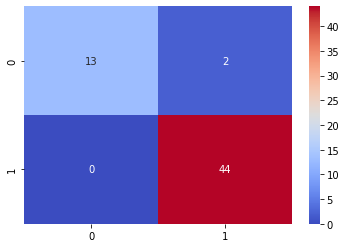

In [954]:
labels = np.unique(y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.96      1.00      0.98        44

    accuracy                           0.97        59
   macro avg       0.98      0.93      0.95        59
weighted avg       0.97      0.97      0.97        59

Accuracy= 0.9661016949152542
precision= 0.9565217391304348
recall= 1.0
f1= 0.9777777777777777


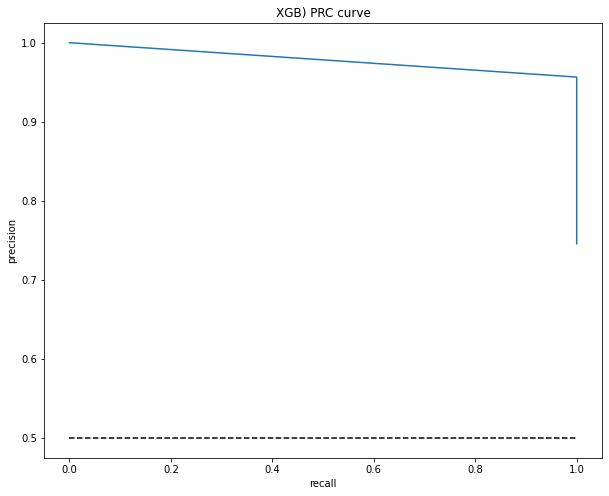

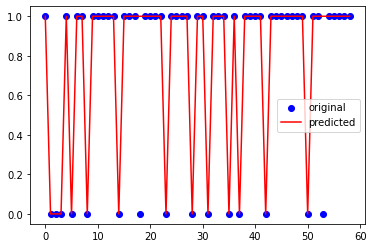

In [955]:
from sklearn.metrics import precision_recall_curve

import numpy as np 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
# XGB classifier machine object
XGB = XGBClassifier()
# train the model on train set
XGB.fit(X_train, y_train.ravel())
predictions = XGB.predict(X_test)
# print classification report
print(classification_report(y_test, predictions))

Accuracy=accuracy_score(y_test, predictions)
precision=precision_score(y_test, predictions)
recall=recall_score(y_test, predictions)
f1=f1_score(y_test, predictions)
print('Accuracy=',Accuracy)
print('precision=',precision)
print('recall=',recall)
print('f1=',f1)






precision, recall, thresholds = precision_recall_curve(y_test, predictions)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'XGB')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('XGB) PRC curve')
plt.show()










y = y_test
yhat = predictions
x = list(range(len(y)))

plt.scatter(x, y, color="blue", label="original")
plt.plot(x, yhat, color="red", label="predicted")
plt.legend()
plt.show() 


